## Import Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.options.display.float_format = '{:20.2f}'.format

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 20)

## Data Extraction & Exploration

In [2]:
df = pd.read_excel('data/online_retail_II.xlsx', sheet_name=0)

In [3]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [4]:
df.info()
# NULL values on Description and Customer ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [6]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [7]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [8]:
df[df['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [9]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match('^\\d{6}$') == False].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [10]:
df['Invoice'].str.replace('\\d', '', regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
df[df['Invoice'].str.replace('\\d', '', regex=True) == 'A']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [12]:
df['StockCode'] = df['StockCode'].astype('str')
rare_stockcode = df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == False)]['StockCode'].unique()

In [13]:
df[df['StockCode'].isin(rare_stockcode)].head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
27750,491715,POST,POSTAGE,1,2009-12-13 15:43:00,18.00,14277.00,France
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.00,United Kingdom
28239,491738,POST,POSTAGE,5,2009-12-14 10:49:00,18.00,12472.00,Germany
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.00,United Kingdom


## Data Cleaning

In [14]:
clean_df = df.copy()

In [15]:
clean_df['Invoice'] = clean_df['Invoice'].astype('str')

mask = (
    clean_df['Invoice'].str.match('^\\d{6}$') == True
)

clean_df = clean_df[mask]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [16]:
clean_df['StockCode'] = clean_df['StockCode'].astype('str')

mask = (
    (clean_df['StockCode'].str.match('^\\d{5}$') == True)
    |(clean_df['StockCode'].str.match('^\\d{5}[a-zA-z]+$') == True)
    |(clean_df['StockCode'].str.match('^PADS$') == True)
)

clean_df = clean_df[mask]

clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [17]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512796.00,512796,512796.00,406337.00
mean,11.00,2010-06-28 18:26:52.709732352,3.39,15373.63
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-21 13:27:00,1.25,14004.00
50%,3.00,2010-07-06 14:25:00,2.10,15326.00
75%,10.00,2010-10-15 14:50:00,4.21,16814.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00
std,104.35,NaN,5.07,1677.37


In [18]:
clean_df = clean_df.dropna(subset=['Customer ID'])
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [19]:
clean_df[clean_df['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
...,...,...,...,...,...,...,...,...
439309,531361,21843,RED RETROSPOT CAKE STAND,2,2010-11-07 14:26:00,0.00,12820.00,United Kingdom
453705,532470,22624,IVORY KITCHEN SCALES,2,2010-11-12 11:41:00,0.00,12647.00,Germany
471775,533822,22846,BREAD BIN DINER STYLE RED,1,2010-11-19 09:40:00,0.00,12647.00,Germany
471776,533822,22845,VINTAGE CREAM CAT FOOD CONTAINER,1,2010-11-19 09:40:00,0.00,12647.00,Germany


In [20]:
lost_info_pct = f'Lost Info while cleaning: {round(( 1 - (len(clean_df)/len(df))) * 100, 2)}%'
lost_info_pct

'Lost Info while cleaning: 22.67%'

## Feature Engineering
- Recency: time since last purchase
- Frequency: Total amount of purchases
- Monetary Value: total amount spent

In [21]:
clean_df['SalesLineTotal'] = clean_df['Quantity'] * clean_df['Price']
clean_df

/tmp/ipykernel_28383/3005326441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['SalesLineTotal'] = clean_df['Quantity'] * clean_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [22]:
aggregated_df = clean_df.groupby(by='Customer ID', as_index=False) \
    .agg(
        MonetaryValue=('SalesLineTotal', 'sum'),
        Frequency=('Invoice', 'nunique'),
        LastInvoice=('InvoiceDate', 'max')
    )

aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoice
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00
4281,18284.00,411.68,1,2010-10-04 11:33:00
4282,18285.00,377.00,1,2010-02-17 10:24:00
4283,18286.00,1246.43,2,2010-08-20 11:57:00


In [23]:
max_invoice_date = aggregated_df['LastInvoice'].max()
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoice']).dt.days
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17
4281,18284.00,411.68,1,2010-10-04 11:33:00,66
4282,18285.00,377.00,1,2010-02-17 10:24:00,295
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111


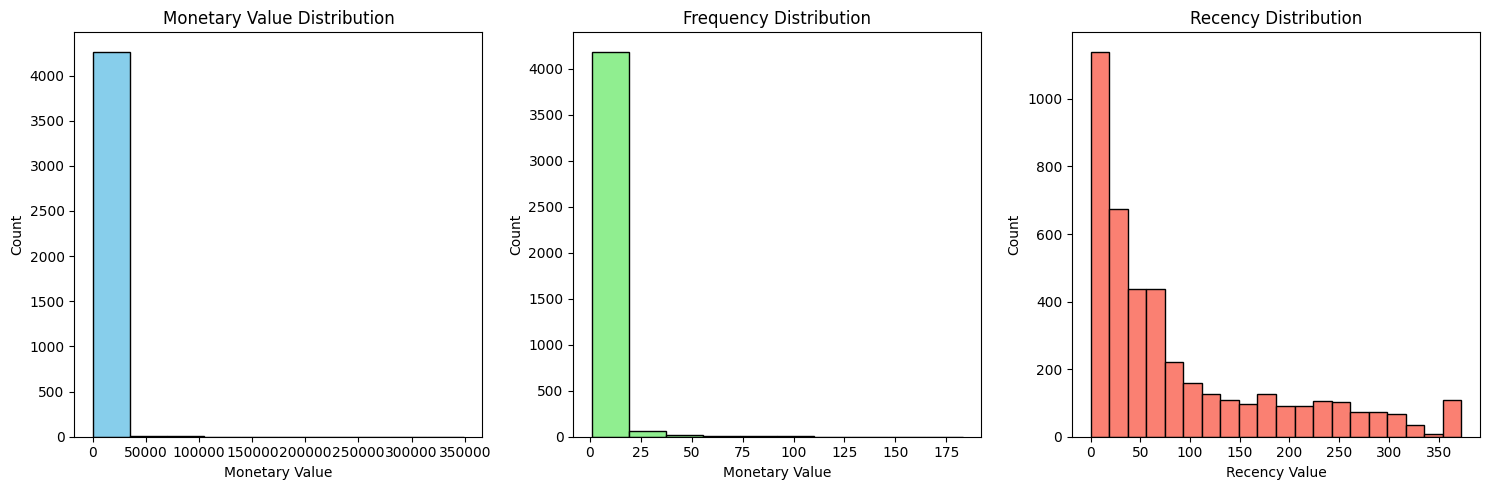

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


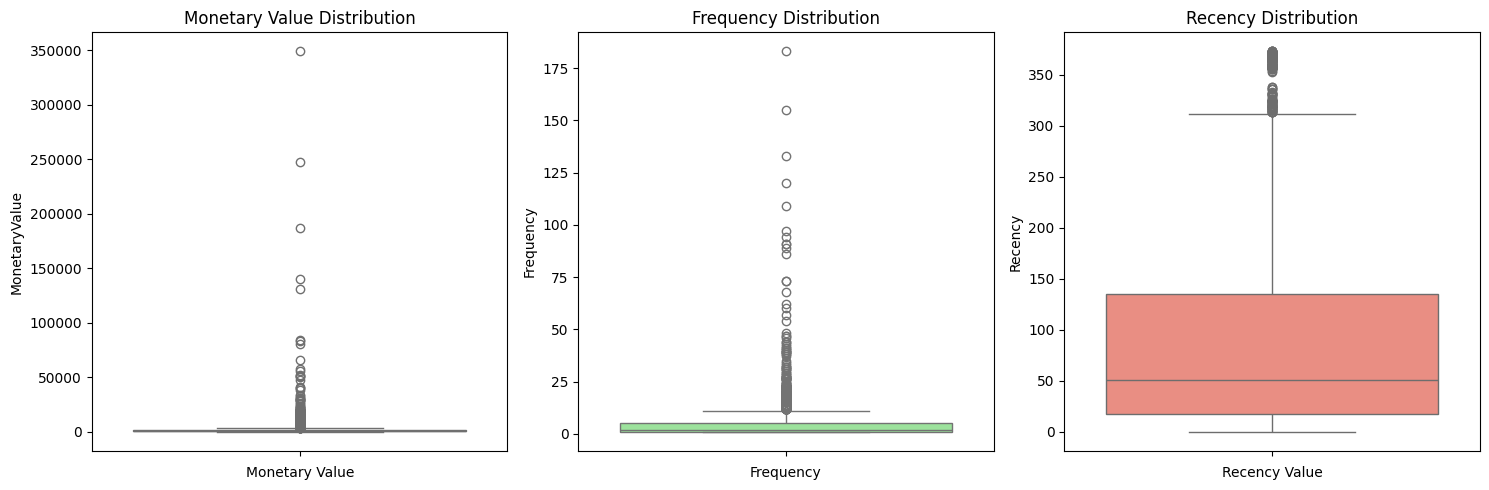

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')


plt.subplot(1,3,2)
sns.boxplot(aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(aggregated_df['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency Value')


plt.tight_layout()
plt.show()


As we see, there are outliers in all our categories but we can't just delete them because those are customers and particularly the ones how spend more and more frequently if we look at both two first charts.
- Separate data in two groups:
  - 'Normal' customers (the one to use for kmean clustering)
  - 'Outlier' customers

In [26]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1
sup_lim = M_Q3 + (M_IQR * 1.5)
inf_lim = M_Q1 - (M_IQR * 1.5)

monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] > sup_lim) | (aggregated_df['MonetaryValue'] < inf_lim)]
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [27]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1
sup_lim = F_Q3 + (F_IQR * 1.5)
inf_lim = F_Q1 - (F_IQR * 1.5)

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > sup_lim) | (aggregated_df['Frequency'] < inf_lim)]
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [28]:
R_Q1 = aggregated_df['Recency'].quantile(0.25)
R_Q3 = aggregated_df['Recency'].quantile(0.75)
R_IQR = R_Q3 - R_Q1
sup_lim = R_Q3 + (R_IQR * 1.5)
inf_lim = R_Q1 - (R_IQR * 1.5)

recency_outliers_df = aggregated_df[(aggregated_df['Recency'] > sup_lim) | (aggregated_df['Recency'] < inf_lim)]
recency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency
count,167.00,167.00,167.00,167,167.00
mean,15429.03,418.32,1.25,2009-12-23 13:52:27.664670720,350.97
min,12439.00,2.95,1.00,2009-12-01 10:49:00,314.00
25%,14115.50,147.35,1.00,2009-12-07 13:03:00,328.50
50%,15413.00,231.90,1.00,2009-12-14 15:07:00,360.00
75%,16812.00,356.18,1.00,2010-01-14 23:56:00,367.00
max,18201.00,9471.50,7.00,2010-01-29 14:22:00,373.00
std,1629.84,950.15,0.80,NaN,20.51


Filtering data to keep those observations which are not outliers.

In [29]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


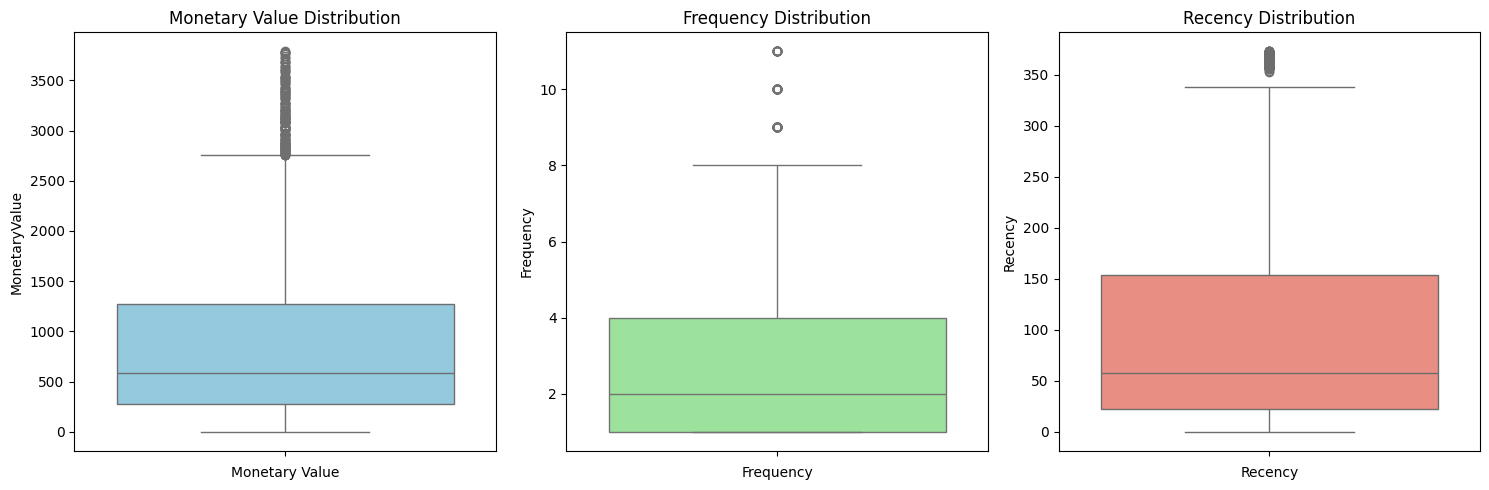

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(non_outliers_df['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()


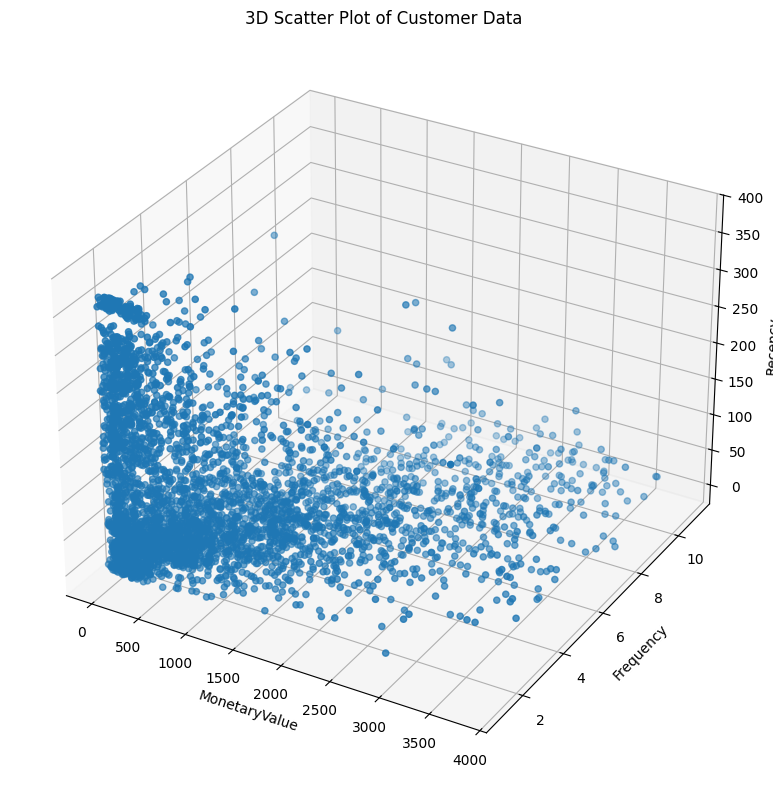

In [31]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'])

ax.set_xlabel('MonetaryValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.tight_layout()
plt.show()

In [32]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [33]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=['MonetaryValue', 'Frequency', 'Recency'])
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


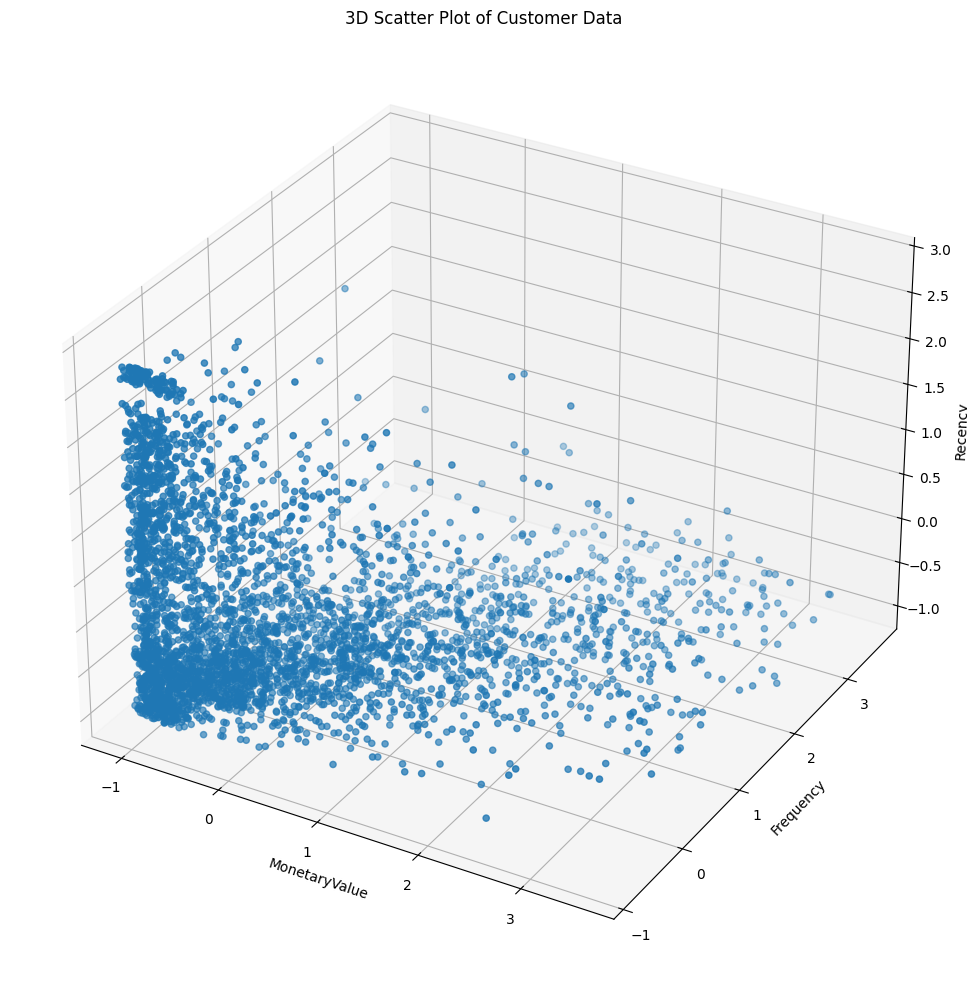

In [44]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'])

ax.set_xlabel('MonetaryValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.tight_layout()
plt.show()

## KMeans Clustering

We will identify the optimal number of clusters by analyzing the inertia of the KMeans algorithm across a range of k values. Subsequently, the elbow method will be applied to detect the inflection point where the rate of decrease in inertia begins to plateau, indicating the most suitable k value.

To further validate the quality of the clustering, we will also incorporate the Silhouette Score metric to ensure robustness in our method.

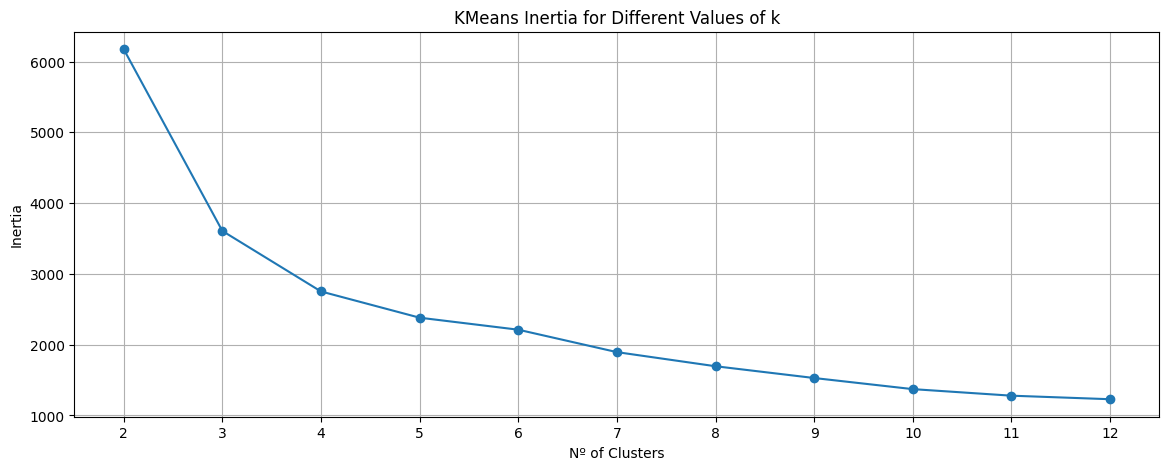

In [37]:
max_k = 12

inertia = []
silhouette_scores = []

k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)
    
    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhouette_scores.append(sil_score)
    
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,5))

plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Nº of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.show()

We could consider *k* values of 4 and 5 as potential candidates for the number of clusters, as both may represent the elbow. However, to decide which one is better, we will plot the Silhouette Scores and compare the results.

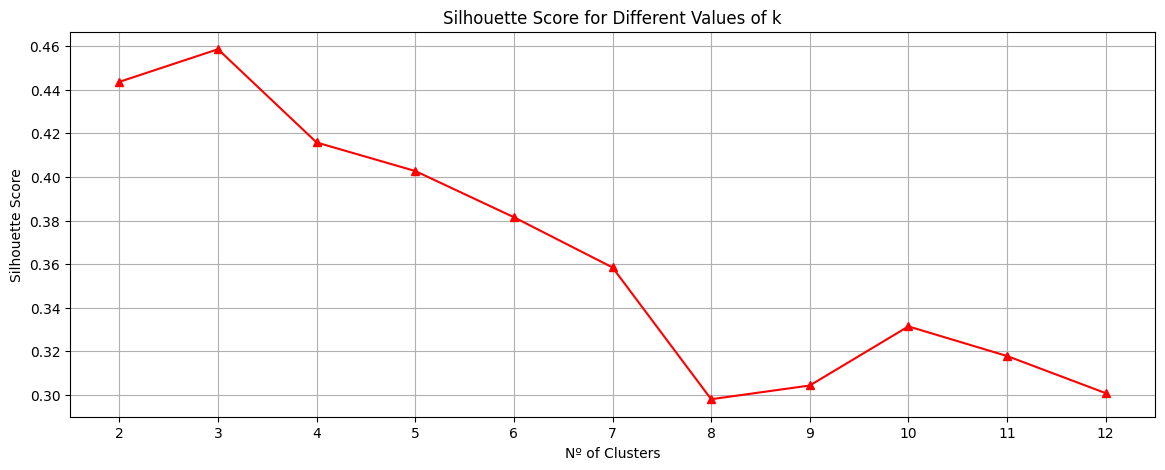

In [36]:
plt.figure(figsize=(14,5))

plt.plot(k_values, silhouette_scores, marker='^', color='red')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Nº of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.show()

In [40]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [41]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df

/tmp/ipykernel_28383/395619450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


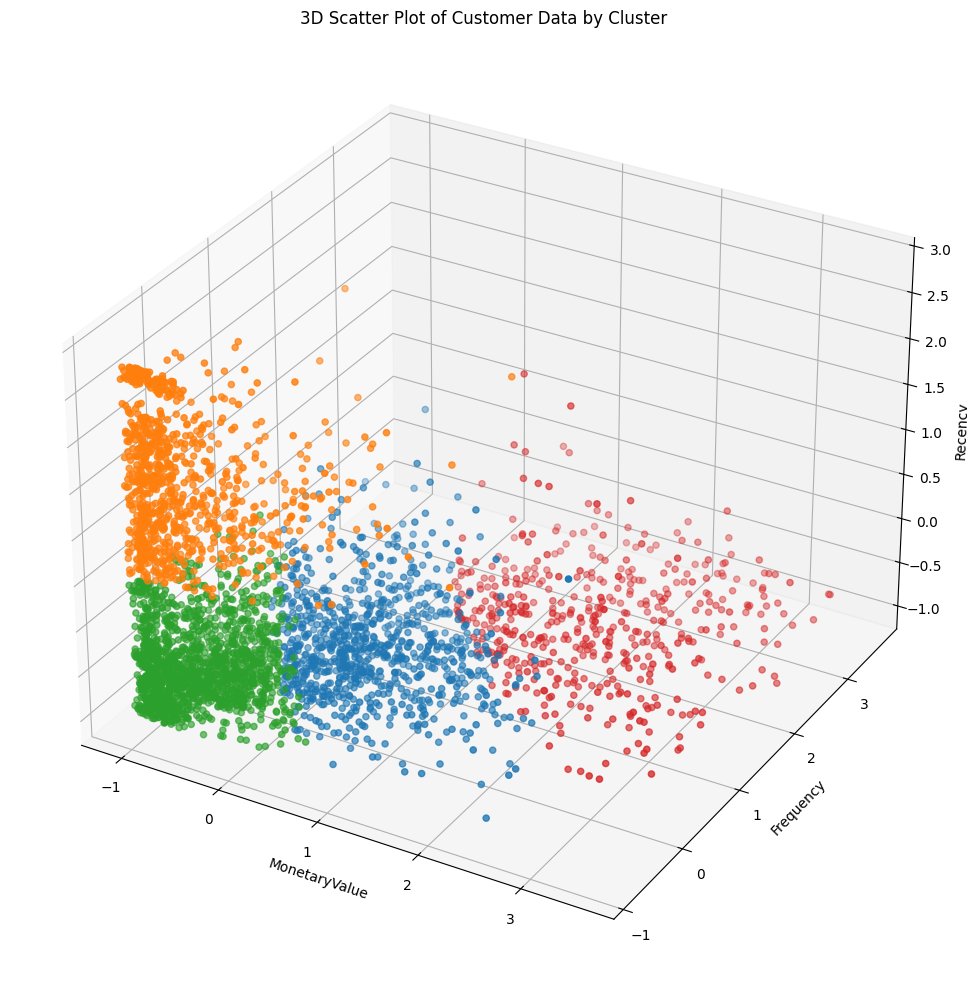

In [58]:
cluster_colors = {
    0:'#1f77b4',
    1:'#ff7f0e',
    2:'#2ca02c',
    3:'#d62728'
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'],
                     scaled_data_df['Frequency'],
                     scaled_data_df['Recency'],
                     c=colors,
                     marker='o')

ax.set_xlabel('MonetaryValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.tight_layout()
plt.show()

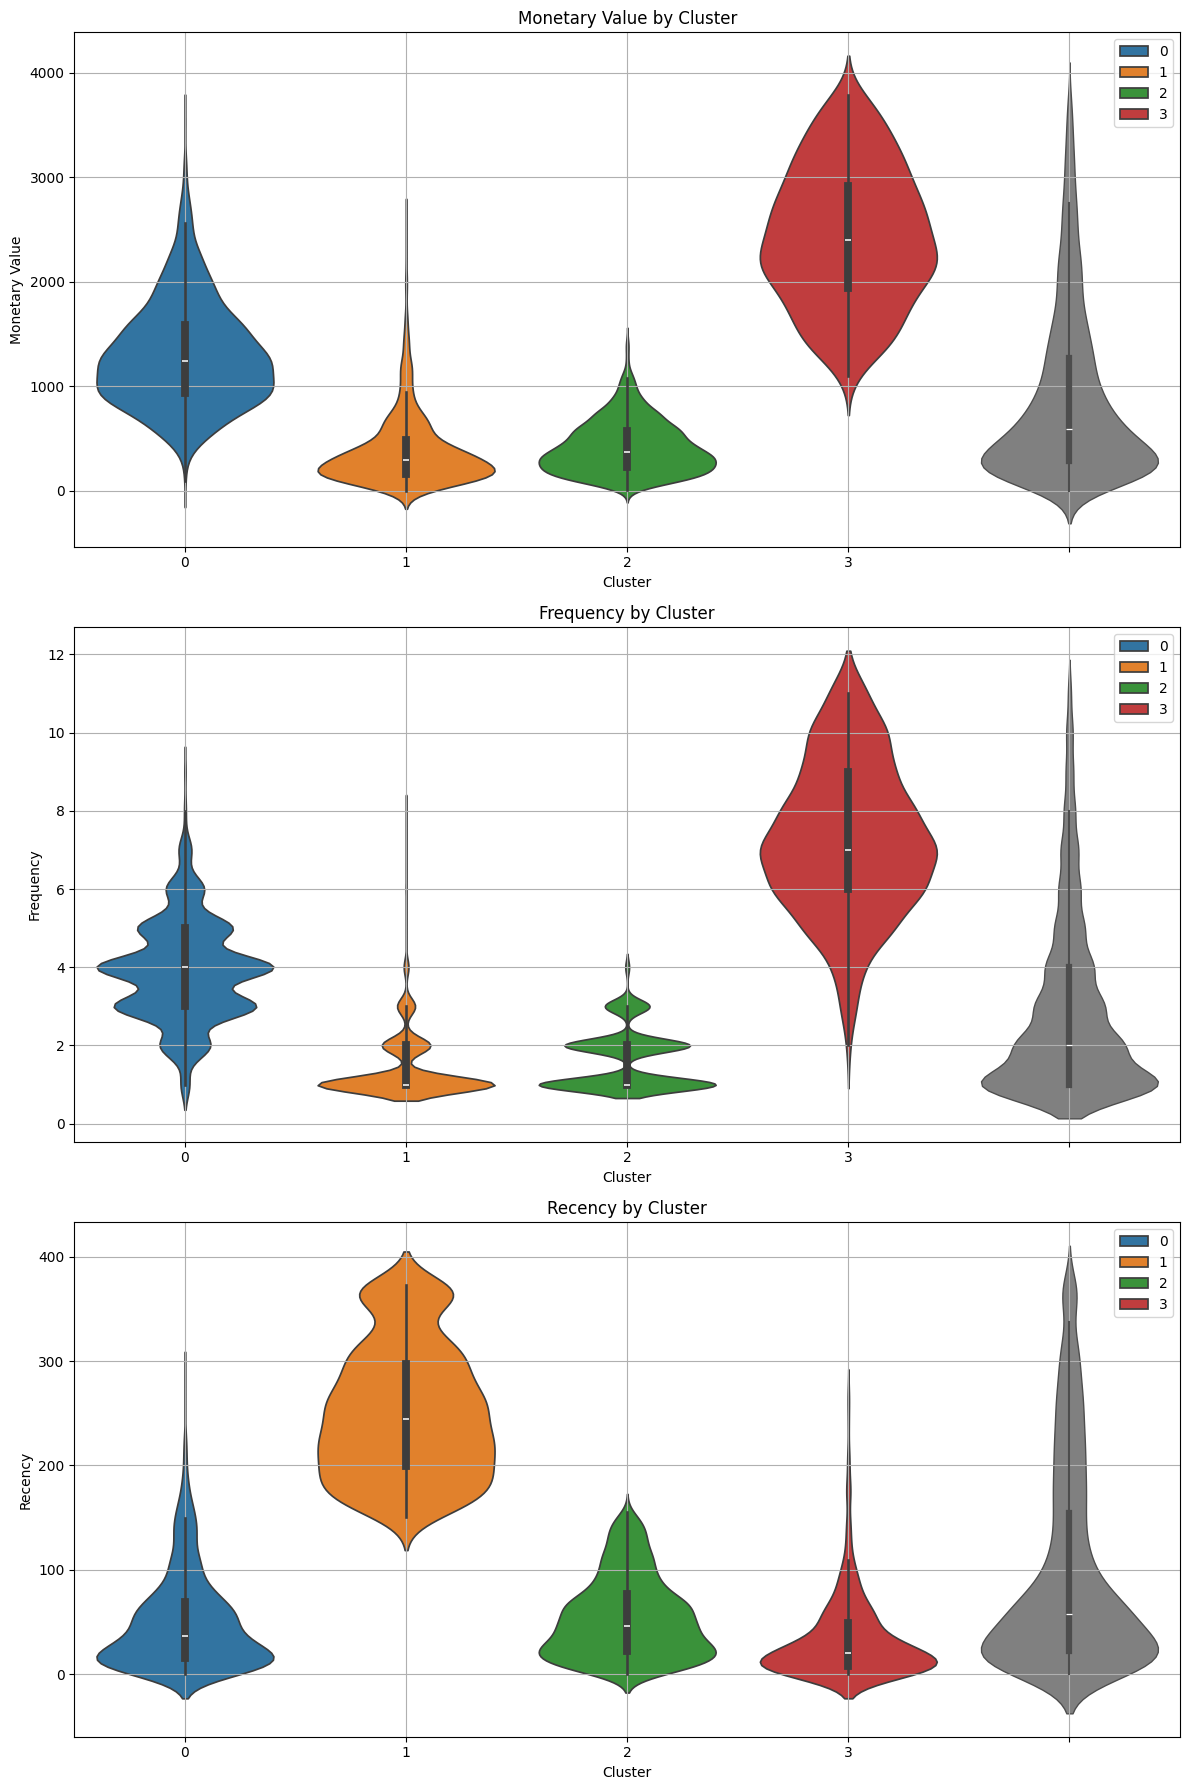

In [62]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')
plt.grid()

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')
plt.grid()

plt.tight_layout()
plt.show()